**Dataset**
labeled datasset collected from twitter (Lab 1 - Hate Speech.tsv)

**Objective**
classify tweets containing hate speech from other tweets. <br>
0 -> no hate speech <br>
1 -> contains hate speech <br>


**Evaluation metric**
macro f1 score

### Import used libraries

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 500)

In [3]:
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import matplotlib as plt
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
import emoji
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from wordcloud import WordCloud
import numpy as np
from gensim.models import Word2Vec
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


### Load Dataset

###### Note: search how to load the data from tsv file

In [3]:
df = pd.read_csv("Hate Speech.tsv", sep= "\t", index_col='id')
df.head(100)

,label,tweet
id,,
1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
3,0,bihday your majesty
4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
5,0,factsguide: society now #motivation
6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦


In [4]:
df.count()

label    31535
tweet    31535
dtype: int64

In [5]:
for i, tweet in enumerate(df["tweet"].sample(10), 1):
    print(f"{i}. {tweet}\n")

1. @user i c sociopaths low iq satanic everything that is an abomination2 god will b the norm as well as committing a1 felonies

2. @user @user @user and i will be perfecting the selfie skills this weekend ð

3. @user you're a garbage human for celebrating violence.

4. can't sleep   #strongeogether #euros #wales

5. #bihday @user from the #rapflashback  #gemini #hiphop #california #westcoast #rap

6. #shopping ...my dress for the business appointment tomorrow or for berlin next week! âºï¸â¤ï¸  â¦

7. #goat basic round button #keychain

8. wait lets do it this way someone has some suggestions that need to be in my playlist for my next streams

9. @user today is a new day   days #goodmood #sohappy #feelgood #bestday

10. i am exquisite. #i_am #positive #affirmation



### insigths
@user not important 

any word after # i think maybe helpfull 

there is many puctatuion like exclamation mark , question mark and this ...

there is much - and extra spaces

 âº, â¦) → These need to be cleaned and decoded.


### Data splitting

It is a good practice to split the data before EDA helps maintain the integrity of the machine learning process, prevents data leakage, simulates real-world scenarios more accurately, and ensures reliable model performance evaluation on unseen data.

In [6]:
X=df.drop("label",axis=1)
y=df.label

In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

### EDA on training data

- check NaNs

In [8]:
x_train.isnull().sum()

tweet    0
dtype: int64

In [9]:
y_train.isnull().sum()

0

- check duplicates

In [10]:
print(x_train.duplicated().sum())
df_duplicated = x_train[x_train.duplicated()]
df_duplicated.head(30)

1807


,tweet
id,
19819,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
27137,i'm so and #grateful now that - #affirmations
28048,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
21653,save $$ no logins x brokers #me #change #memes #love #education #university
12070,i am thankful for rain. #thankful #positive
26437,@user you might be a libtard if... #libtard #sjw #liberal #politics
828,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
9865,"watch #udtapunjab' to know reality: #bhagwantmann, #ghuggi tell -#bjp"
405,have my lover stop being angry at me visit us..&gt;&gt;&gt; #lover #friend #astrologer #love


In [11]:
x_train.drop_duplicates()

,tweet
id,
12411,have you you ever felt like the #nba was fixed? #bamboosled #marketing #nbafinals2016 #nbafinals
19281,@user dear @user please define #systemicracism and #economicapaheid what do you and or #da intend to do to addâ¦
30342,rise and shine! the #e32016 show floor opens today. #e3
30999,rdm and xia #avfc #optimistic roll on august!!! come on you lions!
17036,a dream is only a dream until you take action. make it happen! ðð #saterd... (vine by @user
...,...
30866,@user are you having as nice a day as these happy grapes? #weekend #sunshine #sun #grapes #saturday #fun #wine
18135,need #fun #easy #backgroundmusic? listen to this! --&gt; #royaltyfreemusic #stockmusic
28458,"so many men, too many choices....maybe i should shoot 4 videos in fl?! lmao... #thehowardroarkproject #casting"


- show a representative sample of data texts to find out required preprocessing steps

In [12]:
sample_texts = x_train.sample(n=5, random_state=42)  
print(sample_texts)

                                                                                                                                       tweet
id                                                                                                                                          
15168                           #fathersday to all our #heros !!! let us #celebrate ðððððððððððððð
1547                                 #fathersday  everyone. may you be filled with the love of your abba father today.  #abba #familyrevival
5466                                                             i am in for the quebec city staircase run.   #run #fit #strong     #healthy
27614  daily #affirmation: i am committed to my goals and my success is assured.   #abundance #prosperity #beauty #belief #mindset #selflove
12492                                                                    more wedding dress shopping today ðð #lessthanayear #girltime


Hashtags (#): There are several hashtags like #fathersday, #heros, #celebrate, etc., which seem to indicate important topics or themes in the posts.

Emojis: There are emojis (e.g., ð), which may need to be either removed or processed depending on whether you want to preserve them for sentiment analysis or other purposes.

Text Formatting: The text includes multiple occurrences of spaces, and there are occasional issues with encoding (as seen with emojis).

- check dataset balancing

In [13]:
y.value_counts()

label
0    29322
1     2213
Name: count, dtype: int64

<Axes: >

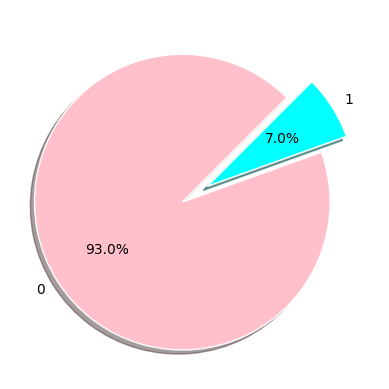

In [14]:
# fig = plt.figure(figsize=(7,7))
colors = ("pink", "cyan")
wp = {'linewidth':1, 'edgecolor':"white"}
tags = df['label'].value_counts()
explode = (0.1, 0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=True, colors = colors, startangle =45, 
         wedgeprops = wp, explode = explode, label='')

######## this is imbalance

- Cleaning and Preprocessing are:
    - 1
    - 2
    - 3
    - ... etc.

### Cleaning and Preprocessing

#### Extra: use custom scikit-learn Transformers

Using custom transformers in scikit-learn provides flexibility, reusability, and control over the data transformation process, allowing you to seamlessly integrate with scikit-learn's pipelines, enabling you to combine multiple preprocessing steps and modeling into a single workflow. This makes your code more modular, readable, and easier to maintain.

##### link: https://www.andrewvillazon.com/custom-scikit-learn-transformers/

#### Example usage:

In [15]:
class TextCleaningTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, text_column='tweet', download_nltk=True, return_tokens=True,join_tokens=True):
        """
        A custom transformer for cleaning text data
        
        Parameters:
        -----------
        text_column : str, default='tweet'
            The name of the column containing text to clean
        download_nltk : bool, default=True
            Whether to download NLTK resources
        return_tokens : bool, default=True
            Whether to return tokenized text or just cleaned text
        """
        self.text_column = text_column
        self.download_nltk = download_nltk
        self.return_tokens = return_tokens
        self.join_tokens = join_tokens
        
        # Download NLTK resources if needed
        if self.download_nltk:
            nltk.download('punkt', quiet=True)
            nltk.download('stopwords', quiet=True)
            
        self.stop_words = set(stopwords.words('english'))
    
    def fix_encoding(self, text):
        """Fix potential encoding issues"""
        if not isinstance(text, str):
            return ""
        try:
            return text.encode('latin1').decode('utf-8')
        except Exception:
            return text
    
    def clean_text(self, text):
        """Clean text by removing unwanted elements"""
        if not isinstance(text, str):
            return ""
        
        # Fix encoding
        text = self.fix_encoding(text)
        # Lowercase
        text = text.lower()
        # Remove @user
        text = re.sub(r'@[\w_]+', '', text)
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)
        # Remove hashtags (keep word)
        text = re.sub(r'#', '', text)
        # Convert emojis to text
        text = emoji.demojize(text, language='en')
        # Remove numbers
        text = re.sub(r'\d+', '', text)
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Remove special characters except colons in emojis
        text = re.sub(r'[^\w\s:]', '', text)
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    
    def tokenize_and_remove_stopwords(self, text):
        """Tokenize text and remove stopwords"""
        tokens = word_tokenize(text)
        filtered_tokens = [word for word in tokens if word not in self.stop_words]
        return filtered_tokens
    
    def fit(self, X, y=None):
        """Fit method (does nothing but required by sklearn API)"""
        return self
    
    def transform(self, X):
        """Transform the input data by cleaning the text"""
        X_transformed = X.copy()
        
        # Step 1: Fix encoding
        X_transformed['clean_text'] = X_transformed[self.text_column].apply(self.fix_encoding)
        
        # Step 2: Clean the text
        X_transformed['clean_text'] = X_transformed['clean_text'].apply(self.clean_text)
        
        # Step 3: Tokenize and remove stopwords if requested
        if self.return_tokens:
            X_transformed['tokens'] = X_transformed['clean_text'].apply(self.tokenize_and_remove_stopwords)
        if self.join_tokens:
            X_transformed['final'] = X_transformed['tokens'].apply(lambda tokens: ' '.join(tokens))
        
        return X_transformed
    
    def fit_transform(self, X, y=None):
        """Combine fit and transform methods"""
        return self.fit(X).transform(X)

In [16]:
text_cleaner = TextCleaningTransformer(text_column='tweet', download_nltk=True, return_tokens=True)

# Apply fit_transform on x_train
x_train_cleaned = text_cleaner.fit_transform(x_train)

# Apply only transform on x_test (using the fitted transformer)
x_test_cleaned = text_cleaner.transform(x_test)

In [17]:
x_train_cleaned

,tweet,clean_text,tokens,final
id,,,,
12411,have you you ever felt like the #nba was fixed? #bamboosled #marketing #nbafinals2016 #nbafinals,have you you ever felt like the nba was fixed bamboosled marketing nbafinals nbafinals,"[ever, felt, like, nba, fixed, bamboosled, marketing, nbafinals, nbafinals]",ever felt like nba fixed bamboosled marketing nbafinals nbafinals
19281,@user dear @user please define #systemicracism and #economicapaheid what do you and or #da intend to do to addâ¦,dear please define systemicracism and economicapaheid what do you and or da intend to do to add,"[dear, please, define, systemicracism, economicapaheid, da, intend, add]",dear please define systemicracism economicapaheid da intend add
30342,rise and shine! the #e32016 show floor opens today. #e3,rise and shine the e show floor opens today e,"[rise, shine, e, show, floor, opens, today, e]",rise shine e show floor opens today e
30999,rdm and xia #avfc #optimistic roll on august!!! come on you lions!,rdm and xia avfc optimistic roll on august come on you lions,"[rdm, xia, avfc, optimistic, roll, august, come, lions]",rdm xia avfc optimistic roll august come lions
17036,a dream is only a dream until you take action. make it happen! ðð #saterd... (vine by @user,a dream is only a dream until you take action make it happen bouquetbouquet saterd vine by,"[dream, dream, take, action, make, happen, bouquetbouquet, saterd, vine]",dream dream take action make happen bouquetbouquet saterd vine
...,...,...,...,...
29064,@user #model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,model i love u take with u all the time in urmobilephone kissingfacewithsmilingeyessmilingfacewithsunglassesmouthtonguesweatdropletssweatdropletssweatdroplets,"[model, love, u, take, u, time, urmobilephone, kissingfacewithsmilingeyessmilingfacewithsunglassesmouthtonguesweatdropletssweatdropletssweatdroplets]",model love u take u time urmobilephone kissingfacewithsmilingeyessmilingfacewithsunglassesmouthtonguesweatdropletssweatdropletssweatdroplets
18135,need #fun #easy #backgroundmusic? listen to this! --&gt; #royaltyfreemusic #stockmusic,need fun easy backgroundmusic listen to this gt royaltyfreemusic stockmusic,"[need, fun, easy, backgroundmusic, listen, gt, royaltyfreemusic, stockmusic]",need fun easy backgroundmusic listen gt royaltyfreemusic stockmusic
28458,"so many men, too many choices....maybe i should shoot 4 videos in fl?! lmao... #thehowardroarkproject #casting",so many men too many choicesmaybe i should shoot videos in fl lmao thehowardroarkproject casting,"[many, men, many, choicesmaybe, shoot, videos, fl, lmao, thehowardroarkproject, casting]",many men many choicesmaybe shoot videos fl lmao thehowardroarkproject casting


In [18]:
# Flatten the list of tokens
all_tokens = [token for tokens in x_train_cleaned['tokens'] for token in tokens]

# Get the frequency of each token
token_counts = Counter(all_tokens)

# Create a DataFrame from the Counter
token_freq_df = pd.DataFrame(token_counts.items(), columns=['Word', 'Frequency'])

# Sort the DataFrame by Frequency in descending order and take the top 10
top_10_tokens_df = token_freq_df.sort_values(by='Frequency', ascending=False).head(50)

# Create treemap
fig = px.treemap(top_10_tokens_df, path=['Word'], values='Frequency', title='Top 50 Most Common Words', color='Frequency')
fig.show()


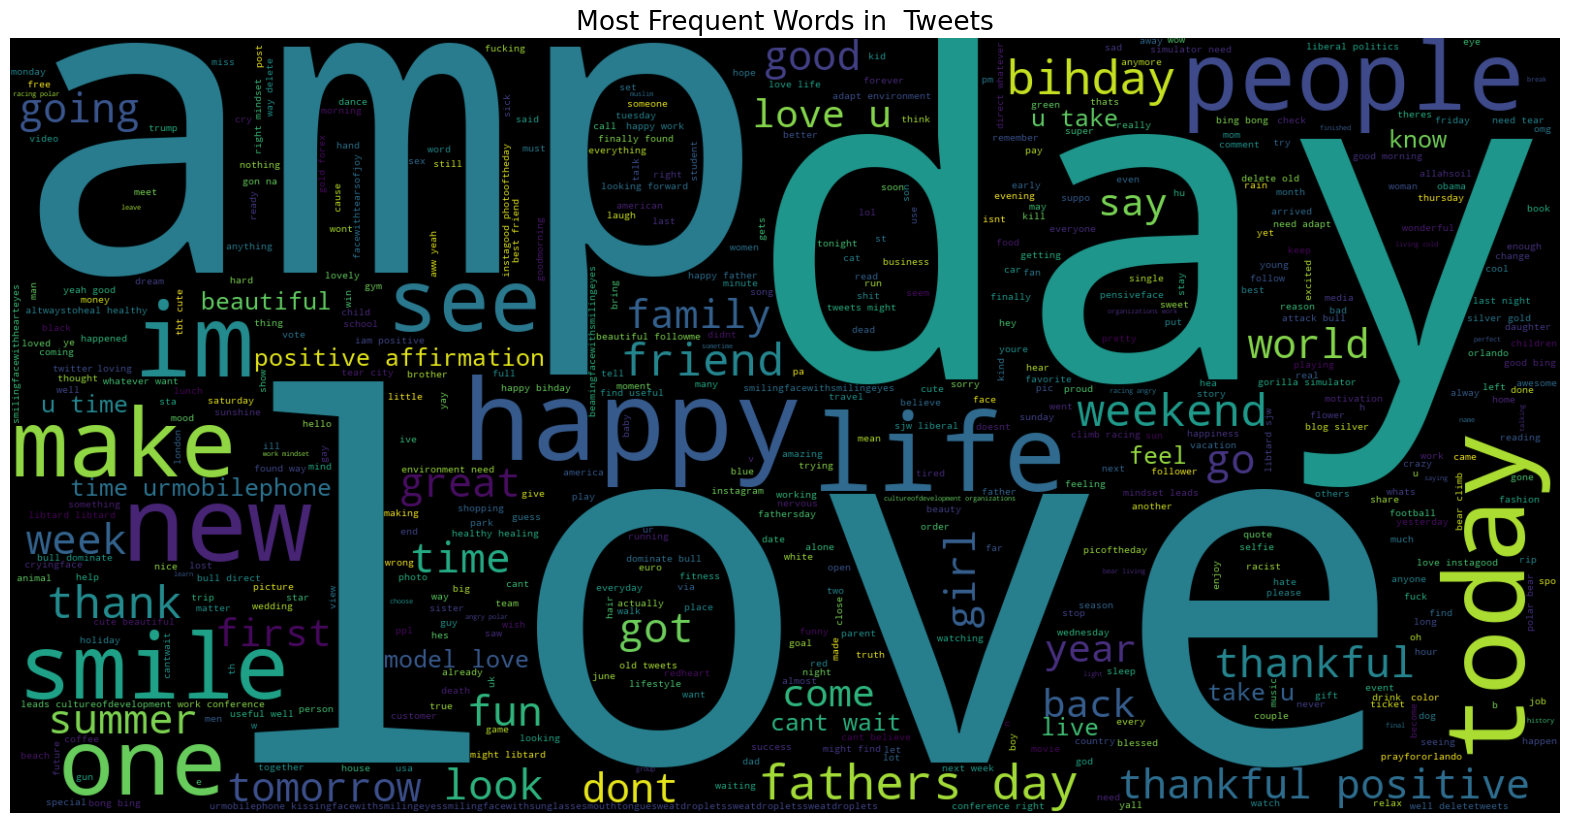

In [19]:


# Flatten the list of tokens
text = ' '.join([word for sublist in x_train_cleaned['tokens'] for word in sublist])

# Create the word cloud
plt.figure(figsize=(20, 15), facecolor='None')  # Adjust figure size for better visualization
wordcloud = WordCloud(max_words=500, width=1600, height=800, background_color="black").generate(text)

# Plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')  # Use bilinear interpolation for a smooth image
plt.axis('off')  # Turn off axis
plt.title('Most Frequent Words in  Tweets', fontsize=19)  # Set title font size
plt.show()  # Display the plot


### Vectorizing

In [20]:
x_train_final=x_train_cleaned['final']
x_test_final=x_test_cleaned['final']

BOW

In [21]:

Count_Vectorizer = CountVectorizer()
x_train_bow = Count_Vectorizer.fit_transform(x_train_cleaned['final'])
x_test_bow = Count_Vectorizer.transform(x_test_cleaned['final'])


TF-IDF

In [22]:
Tfidf_Vectorizer = TfidfVectorizer()
x_train_tfidf = Tfidf_Vectorizer.fit_transform(x_train_cleaned['final'])
x_test_tfidf = Tfidf_Vectorizer.transform(x_test_cleaned['final'])

word2vec

In [23]:

model = Word2Vec(sentences=x_train_cleaned['tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Save the model for later use
model.save("my_word2vec_model_1.model")


In [24]:
def get_average_word2vec(tokens, model, vector_size=100):
    # Get word vectors for each token in the document
    word_vectors = [model.wv[word] for word in tokens if word in model.wv]
    
    # If no vectors found, return a zero vector
    if len(word_vectors) == 0:
        return np.zeros(vector_size)
    
    # Average the word vectors to get a single vector for the document
    return np.mean(word_vectors, axis=0)

# Assuming you have tokenized text data in x_train['tokens']
x_train_cleaned['word2vec'] = x_train_cleaned['tokens'].apply(lambda tokens: get_average_word2vec(tokens, model))
x_test_cleaned['word2vec'] = x_test_cleaned['tokens'].apply(lambda tokens: get_average_word2vec(tokens, model))
# Convert to numpy array for use in machine learning model
x_train_word2vec = np.vstack(x_train_cleaned['word2vec'].values)
x_test_word2vec = np.vstack(x_test_cleaned['word2vec'].values)

glove

In [25]:
def load_glove_model(file_path):
    glove_model = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            glove_model[word] = vector
    return glove_model

In [26]:
glove_path = r'C:\Users\dell\Downloads\glove.6B.100d.txt'
glove_model = load_glove_model(glove_path)


In [27]:
def get_average_glove(tokens, model, vector_size=100):
    word_vectors = [model[word] for word in tokens if word in model]
    
    if len(word_vectors) == 0:
        return np.zeros(vector_size)  # Return zero vector if no words are in the GloVe model
    
    return np.mean(word_vectors, axis=0)

# Apply to your data (assuming 'clean_tokens' is the column with tokenized words)
x_train_cleaned['tokens'] = x_train_cleaned['tokens'].apply(lambda tokens: get_average_glove(tokens, glove_model))
x_test_cleaned['tokens'] = x_test_cleaned['tokens'].apply(lambda tokens: get_average_glove(tokens, glove_model))
# Convert to numpy array for model input
x_train_glove = np.vstack(x_train_cleaned['tokens'].values)
x_test_glove = np.vstack(x_test_cleaned['tokens'].values)


#### Handling unbalance

SMOTE (Synthetic Minority Over-sampling Technique) is a method used to address class imbalance in machine learning. Instead of duplicating minority class samples, SMOTE generates synthetic samples by interpolating between existing minority class instances. It selects k-nearest neighbors for each minority sample and creates new samples along the line segments between the sample and its neighbors, helping to balance the class distribution and avoid overfitting.

In [28]:
y_train.value_counts()

label
0    23491
1     1737
Name: count, dtype: int64

In [29]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(x_train_tfidf, y_train)

In [30]:
y_res.value_counts()

label
0    23491
1    23491
Name: count, dtype: int64

<Axes: xlabel='label'>

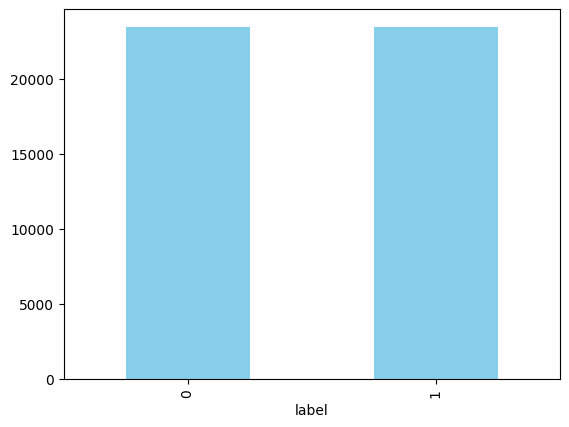

In [31]:
y_res.value_counts().plot(kind='bar', color='skyblue')


**You  are doing Great so far!**

### Modelling

#### Extra: use scikit-learn pipline

##### link: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

Using pipelines in scikit-learn promotes better code organization, reproducibility, and efficiency in machine learning workflows.

#### Example usage:

In [32]:
logreg = LogisticRegression()

In [33]:
from imblearn.pipeline import Pipeline

In [34]:
pipeline = Pipeline(steps=[
    ('preprocessing', TextCleaningTransformer(text_column='tweet', download_nltk=True, return_tokens=True)),
    ('vectorizing', TfidfVectorizer()),  # Vectorizer step
    ('smote', SMOTE(random_state=42)),  # SMOTE step for resampling
    ('model', logreg)  # Initial model step (you can replace with RandomForestClassifier later)
])
# pipeline.fit(x_test_cleaned['tweet'], y_train)  # Fit with training data
# y_pred = pipeline.predict(x_test_cleaned['tweet'])

In [35]:
model = LogisticRegression()  # You can adjust max_iter as per convergence
model.fit(X_res, y_res)

LogisticRegression()

In [36]:
model.score(X_res,y_res)

0.9692648248265293

In [37]:
model.score(x_test_tfidf,y_test)

0.9437133343903599

In [38]:
y_pred=model.predict(x_test_tfidf)

#### Evaluation

**Evaluation metric:**
macro f1 score

Macro F1 score is a useful metric in scenarios where you want to evaluate the overall performance of a multi-class classification model, **particularly when the classes are imbalanced**

![Calculation](https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/639c3d934e82c1195cdf3c60_macro-f1.webp)

In [39]:
from sklearn.metrics import f1_score

# Assume y_true are the true labels and y_pred are the predicted labels
f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"Macro F1 Score: {f1_macro}")

Macro F1 Score: 0.8230748594328638


In [40]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[5580  251]
 [ 104  372]]


              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5831
           1       0.60      0.78      0.68       476

    accuracy                           0.94      6307
   macro avg       0.79      0.87      0.82      6307
weighted avg       0.95      0.94      0.95      6307



### Enhancement

- Using different vectorizers with different hyperparameters
- Trying different ML models and doing hyperparameter tuning

#### logistigRegression with_tf_IDF

In [41]:
Tfidf_Vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
x_train_tfidf = Tfidf_Vectorizer.fit_transform(x_train_cleaned['final'])
x_test_tfidf = Tfidf_Vectorizer.transform(x_test_cleaned['final'])

In [42]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(x_train_tfidf, y_train)

In [43]:
model_2=LogisticRegression()
model_2.fit(X_res,y_res)

LogisticRegression()

In [44]:
model_2.score(X_res,y_res)

0.7655697926865608

In [45]:
model_2.score(x_test_tfidf,y_test)

0.4957983193277311

if i make ngram(3,3) there is under fitting

In [46]:
y_pred_2=model_2.predict(x_test_tfidf)

In [47]:
from sklearn.metrics import f1_score

# Assume y_true are the true labels and y_pred are the predicted labels
f1_macro = f1_score(y_test, y_pred_2, average='macro')
print(f"Macro F1 Score: {f1_macro}")

Macro F1 Score: 0.4220471070455394


### logisticRegression with word2vec

In [48]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(x_train_word2vec, y_train)

In [7]:
from sklearn.naive_bayes import MultinomialNB

ImportError: cannot import name '__version__' from 'numpy' (unknown location)

In [49]:
model_3=LogisticRegression()
model_3.fit(X_res,y_res)

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [50]:
model_3.score(X_res,y_res)

0.7616321144268018

In [51]:
model_3.score(x_test_word2vec,y_test)

0.712224512446488

In [52]:
y_pred_3=model_3.predict(x_test_word2vec)

In [53]:
from sklearn.metrics import f1_score

# Assume y_true are the true labels and y_pred are the predicted labels
f1_macro = f1_score(y_test, y_pred_3, average='macro')
print(f"Macro F1 Score: {f1_macro}")

Macro F1 Score: 0.5589548723787288


In [62]:
print(confusion_matrix(y_test, y_pred_3))
print("\n")
print(classification_report(y_test, y_pred_3))

[[4105 1726]
 [  89  387]]


              precision    recall  f1-score   support

           0       0.98      0.70      0.82      5831
           1       0.18      0.81      0.30       476

    accuracy                           0.71      6307
   macro avg       0.58      0.76      0.56      6307
weighted avg       0.92      0.71      0.78      6307



##### Random_forest with _glove

In [54]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(x_train_glove, y_train)

In [55]:
y_res.value_counts()

label
0    23491
1    23491
Name: count, dtype: int64

In [87]:
RS=RandomForestClassifier(max_depth=15)
RS.fit(X_res,y_res)

RandomForestClassifier(max_depth=15)

In [88]:
RS.score(X_res,y_res)

0.9861010599804181

In [89]:
RS.score(x_test_glove,y_test)

0.9197716822578088

In [90]:
y_pred_4=RS.predict(x_test_word2vec)

In [91]:
from sklearn.metrics import f1_score

# Assume y_true are the true labels and y_pred are the predicted labels
f1_macro = f1_score(y_test, y_pred_4, average='macro')
print(f"Macro F1 Score: {f1_macro}")

Macro F1 Score: 0.5318088554658502


In [92]:
print(confusion_matrix(y_test, y_pred_4))
print("\n")
print(classification_report(y_test, y_pred_4))

[[5620  211]
 [ 433   43]]


              precision    recall  f1-score   support

           0       0.93      0.96      0.95      5831
           1       0.17      0.09      0.12       476

    accuracy                           0.90      6307
   macro avg       0.55      0.53      0.53      6307
weighted avg       0.87      0.90      0.88      6307



In [93]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(x_train_bow, y_train)

In [ ]:
RS=RandomForestClassifier()
RS.fit(X_res,y_res)

LogisticRegression()

In [110]:
RS.score(X_res,y_res)

0.9775020220509982

In [111]:
RS.score(x_test_bow,y_test)

0.8904391945457428

In [112]:
y_pred_5=RS.predict(x_test_bow)

In [113]:
from sklearn.metrics import f1_score

# Assume y_true are the true labels and y_pred are the predicted labels
f1_macro = f1_score(y_test, y_pred_5, average='macro')
print(f"Macro F1 Score: {f1_macro}")

Macro F1 Score: 0.71433188832288


### Conclusion and final results


In my result i think traditional methods like tf_idf,word2vec give me high accuracy rather than advaned 

#### Done!